In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import warnings
warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/MALGUN.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import cm 
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.font_manager as fm
plt.rc('font', family='AppleGothic') # for MAC OS users
#plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) # for Windows OS user

In [2]:
S사 = pd.read_csv('../../3. 에포크_데이터 및 모델 세이브 파일/data/text/ssg페이_블로그토큰화_ver2.csv').sort_values('빈도가중치', ascending=False).reset_index(drop=True)
lpoint = pd.read_csv('../../3. 에포크_데이터 및 모델 세이브 파일/data/text/lpoint_df.csv').sort_values('빈도', ascending=False).reset_index(drop=True)
H사 = pd.read_csv('../../3. 에포크_데이터 및 모델 세이브 파일/data/text/hpoint_tf.csv').sort_values('빈도', ascending=False).reset_index(drop=True)
N사 = pd.read_csv('../../3. 에포크_데이터 및 모델 세이브 파일/data/text/naverpay_df.csv').sort_values('빈도', ascending=False).reset_index(drop=True)
K사 = pd.read_csv('../../3. 에포크_데이터 및 모델 세이브 파일/data/text/kakao_tf.csv').sort_values('빈도', ascending=False).reset_index(drop=True)

In [11]:
H사 = H사[['단어', '빈도']]
H사['출처'] = 'H사'

In [12]:
S사 = S사[['단어', '빈도']]
S사['출처'] = 'S사'

In [13]:
K사 = K사[['단어', '빈도']]
K사['출처'] = 'K사'

In [16]:
N사['출처'] = 'N사'

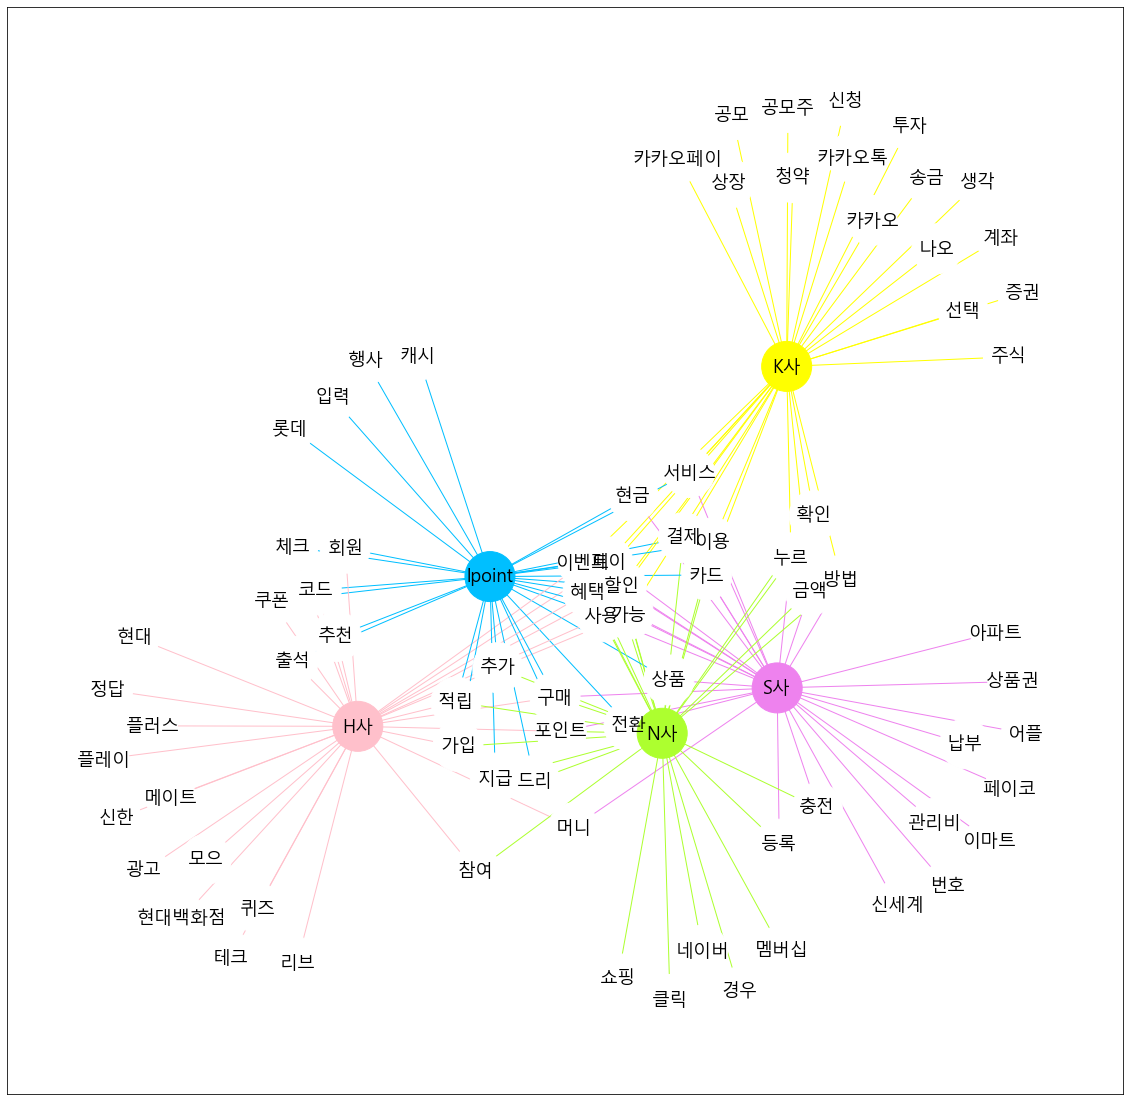

In [29]:
nx_df = pd.concat([S사.iloc[:30], lpoint.iloc[:30], H사.iloc[:30], N사.iloc[:30], K사.iloc[:30]])

g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(nx_df, source = '단어', target = '출처')
pos = nx.spring_layout(g, k = 0.1, iterations=200)


color_map_node = []
for node in g:
    if node == 'S사':
        color_map_node.append('violet')
    elif node == 'N사':
        color_map_node.append('greenyellow')
    elif node == 'lpoint':
        color_map_node.append('deepskyblue')
    elif node == 'H사':
        color_map_node.append('pink')
    elif node == 'K사':
        color_map_node.append('yellow')
    else:
        color_map_node.append('white')

color_map_edge = []
for edges in g.edges():
    if 'S사' in edges:
        color_map_edge.append('violet')
    if 'N사' in edges:
        color_map_edge.append('greenyellow')
    if 'H사' in edges:
        color_map_edge.append('pink')
    if 'lpoint' in edges:
        color_map_edge.append('deepskyblue')
    if 'K사' in edges:
        color_map_edge.append('yellow')

plt.figure(figsize=(20, 20))

nx.draw_networkx_nodes(g, pos, node_size = 2500, node_color = color_map_node )
nx.draw_networkx_edges(g, pos, width=1, edge_color = color_map_edge)
nx.draw_networkx_labels(g, pos, font_family='malgun gothic', font_size=18 , font_weight = 'normal')

plt.show()